# Klasifikasi Jenis Kopra dengan Konsep Ensembel Learning

Kontribusi Riset
- Pengaruh metode pembagian data = Split Validasi dan Cross Validasi
- Pengaruh persentase pembagian data = 70% dan 30%, 80% dan 20%, 90% dan 10%
- Ektrasi Fitur = Warna, Bentuk, Tesktur
- Metode Klasifikasi = KNN, SVM, DT, RF, NB, LR, LDA, QDA
- Metode Ensambel Learning = Votting, Bagging, Stacking, AdaBoost

In [1]:
from ipynb.fs.full.akuisisi_data import *

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean-R           1839 non-null   float64
 1   Mean-G           1839 non-null   float64
 2   Mean-B           1839 non-null   float64
 3   Mean-H           1839 non-null   float64
 4   Mean-V           1839 non-null   float64
 5   Mean-S           1839 non-null   float64
 6   Mean-Gray        1839 non-null   float64
 7   Standar-Deviasi  1839 non-null   float64
 8   Luas             1839 non-null   float64
 9   Perimeter        1839 non-null   float64
 10  Contrast         1839 non-null   float64
 11  Dissimilarity    1839 non-null   float64
 12  Homogeneity      1839 non-null   float64
 13  Energy           1839 non-null   float64
 14  Correlation      1839 non-null   float64
 15  Jenis Kopra      1839 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 230.0 KB


## 3. Praproses Data

- Setting experiment

In [2]:
# # 1. skenario W
# print("Percobaan 1")
# x = dataset.iloc[:,0:8].values

# 2. skenario B
print("Percobaan 2")
x = dataset.iloc[:,8:10].values

# # 3. skenario T
# print("Percobaan 3")
# x = dataset.iloc[:,10:15].values

# # 4. Skenario W dan B
# print("Percobaan 4")
# x = dataset.iloc[:,0:10].values

# # 5. Skenario W dan T
# print("Percobaan 5")
# x = dataset.iloc[:,0:13].values

# # 6. Skenario B dan T
# print("Percobaan 6")
# x = dataset.iloc[:,8:15].values

# # 7. Skenario W,B,dan T
# print("Percobaan 7")
# x = dataset.iloc[:,0:15].values

# Taget, Jenis Kopra
y = dataset.iloc[:,[-1]].values
y = y.reshape(len(y))

Percobaan 2


In [3]:
# feature
np.round(x[:5],4)

array([[ 7933.5   ,  2053.3048],
       [33489.    ,  1334.8469],
       [ 1958.5   ,   573.8549],
       [ 2908.    ,   862.9747],
       [31867.5   ,   706.1392]])

In [4]:
# label
np.round(y[:-1])

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

- Normalisasi MinMax

In [5]:
# normalize features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [6]:
np.round(x[:5],4)

array([[0.0461, 0.3391],
       [0.1947, 0.2205],
       [0.0114, 0.0948],
       [0.0169, 0.1425],
       [0.1853, 0.1166]])

- Split Data Testing dan Data Training

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=0)

## 4. Concept Supervised Learning

In [8]:
# 1. KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1, metric='euclidean').fit(x_train,y_train).predict(x_test)

# 2. SVM
svm = SVC(kernel='rbf', random_state=1234).fit(x_train,y_train).predict(x_test)

# 3. C45
c45 = DecisionTreeClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

# 4. RF
rf = RandomForestClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

# 5. NB
nb = MultinomialNB().fit(x_train,y_train).predict(x_test)

# 6. LR
lr = LogisticRegression(random_state=1234).fit(x_train, y_train).predict(x_test)

# 7. LDA
lda = LinearDiscriminantAnalysis().fit(x_train,y_train).predict(x_test)

# 8. LDQ
ldq = QuadraticDiscriminantAnalysis().fit(x_train,y_train).predict(x_test)

## 5. Evaluasi Model

In [9]:
hasil = pd.DataFrame({
    "K Nearest-Neighbor": knn,
    "Suport Vector Machine": svm,
    "Decision Tree": c45,
    "Random Forest": rf,
    "Naive Bayes": nb,
    "Logistic Regresi": lr,
    "Linear Discriminant Analysis": lda,
    "Quadratic Discriminant Analysis": ldq,
    "Target": y_test
})

In [10]:
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

K Nearest-Neighbor
0.5435
0.5481
0.5307
0.5294
------------------------- 

Suport Vector Machine
0.5109
0.5128
0.5063
0.508
------------------------- 

Decision Tree
0.5598
0.5513
0.5519
0.5514
------------------------- 

Random Forest
0.5761
0.5694
0.5684
0.568
------------------------- 

Naive Bayes
0.3533
0.4017
0.3649
0.3227
------------------------- 

Logistic Regresi
0.3913
0.4129
0.3937
0.3733
------------------------- 

Linear Discriminant Analysis
0.3913
0.4144
0.3947
0.3748
------------------------- 

Quadratic Discriminant Analysis
0.4239
0.466
0.4277
0.3684
------------------------- 



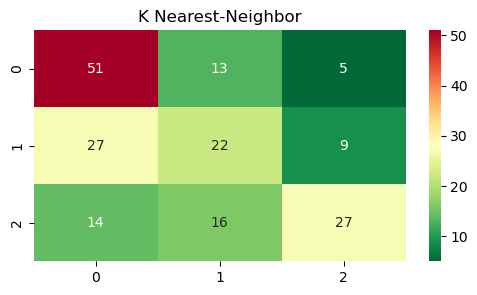

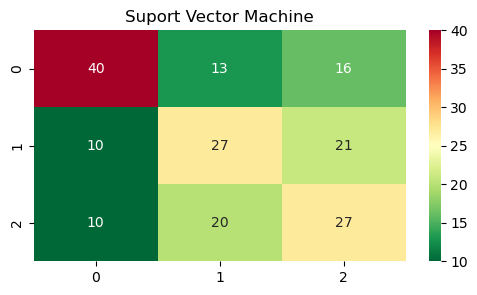

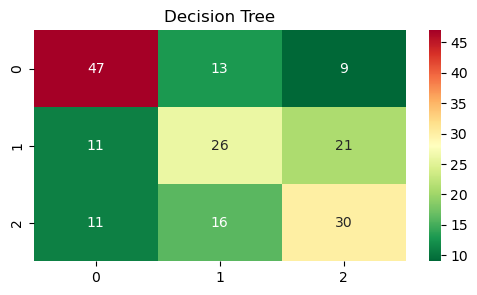

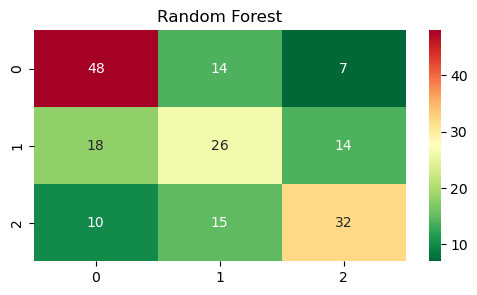

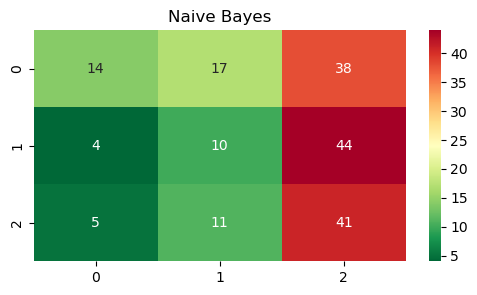

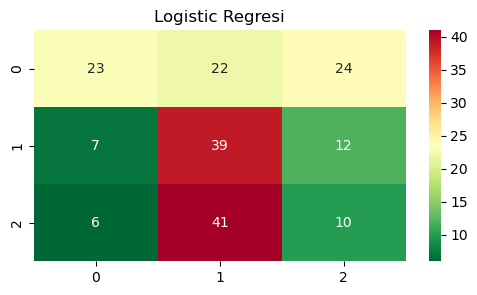

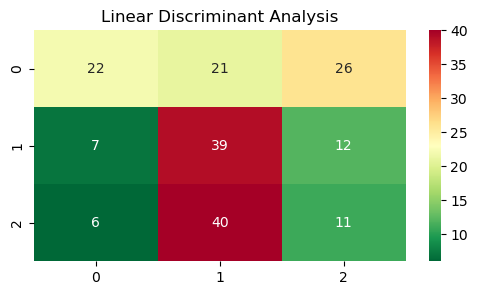

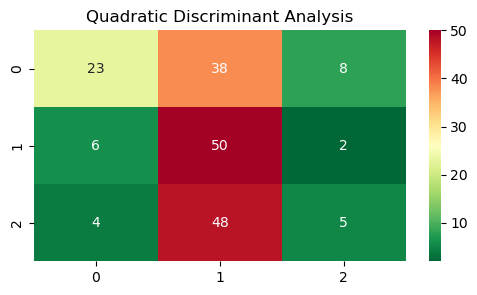

In [11]:
for i in range(len(hasil.columns)-1):
    fig,ax = plt.subplots(figsize=(6,3))
    sns.heatmap(confusion_matrix(hasil["Target"], hasil.iloc[:,i:i+1]),annot=True, cmap="RdYlGn_r")
    plt.title(hasil.columns[i], fontsize=12)
    plt.show()